## Demographics Check

**Karina Huang, Lipika Ramaswamy**

**May 14, 2019**

---

Demographics check to compare `cleanData.csv` and `test_data.csv`.

In [1]:
#import packages
import csv
import re
import pandas as pd
import seaborn as sns
from collections import Counter, defaultdict
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [2]:
#all columns
test_data_header = ['course_id', 'user_id', 'registered', 'viewed', 'explored', 'certified', 
                    'completed', 'ip', 'cc_by_ip', 'countryLabel', 'continent', 'city', 'region', 
                    'subdivision', 'postalCode', 'un_major_region', 'un_economic_group', 'un_developing_nation', 
                    'un_special_region', 'latitude', 'longitude', 'LoE', 'YoB', 'gender', 'grade', 'passing_grade', 
                    'start_time', 'first_event', 'last_event', 'nevents', 'ndays_act', 'nplay_video', 'nchapters', 
                    'nforum_posts', 'nforum_votes', 'nforum_endorsed', 'nforum_threads', 'nforum_comments', 'nforum_pinned', 
                    'roles', 'nprogcheck', 'nproblem_check', 'nforum_events', 'mode', 'is_active', 'cert_created_date', 
                    'cert_modified_date', 'cert_status', 'verified_enroll_time', 'verified_unenroll_time', 'profile_country', 
                    'y1_anomalous', 'email_domain', 'language_brwsr', 'language_brwsr_country', 'language_brwsr_sec', 
                    'language_brwsr_sec_country', 'language_brwsr_code', 'language_brwsr_subcode', 'language_brwsr_sec_code', 
                    'language_brwsr_sec_subcode', 'language_brwsr_nevents', 'language_brwsr_ndiff', 'language', 'language_download', 
                    'language_nevents', 'language_ndiff', 'ntranscript', 'nshow_answer', 'nvideo', 'nvideos_unique_viewed', 
                    'nvideos_total_watched', 'nseq_goto', 'nseek_video', 'npause_video', 'avg_dt', 'sdv_dt', 'max_dt', 'n_dt', 
                    'sum_dt', 'roles_isBetaTester', 'roles_isInstructor', 'roles_isStaff', 'roles_isCCX', 'roles_isFinance', 
                    'roles_isLibrary', 'roles_isSales', 'forumRoles_isAdmin', 'forumRoles_isCommunityTA', 
                    'forumRoles_isModerator', 'forumRoles_isStudent']

In [3]:
#clean data columns
idxUSE = [0, 8, 21, 22, 23, 29, 24, 30, 32, 33, 75, 39]
clean_data_header = [test_data_header[i] for i in idxUSE]

In [4]:
def getCourseCat(course):
    '''get course category/department'''
    catL = re.search('[a-zA-Z]*', course)[0]
    catN = re.search('[0-9]*', course)[0]
    if catL != '':
        return catL
    elif catN != '':
        return catN

def getDemoCnt(file, clean = True):
    '''get demographic counts'''
    #cache counter and list objects 
    course = Counter() #idx0
    cc = Counter() #idx1
    loe = Counter() #idx2
    yob = list() #idx3
    gender = Counter() #idx4
    nevents = list() #idx5
    grade = list()#idx6
    
    records = 0
    
    skip = 0
    with open(file, 'r') as data:
        r = csv.reader(data)
        
        for row in r:
            if clean:
                cols = row.copy()
            else:
                cols = [row[i] for i in idxUSE]
            if skip == 0:
                skip += 1
            else:
                try:
                    cols[0] = cols[0].split('/')[1]
                    cols[0] = getCourseCat(cols[0])
                except:
                    cols = cols
                course[cols[0]] += 1
                cc[cols[1]] += 1
                loe[cols[2]] += 1
                yob.append(cols[3])
                gender[cols[4]] += 1
                nevents.append(cols[5])
                grade.append(cols[6])
                records += 1
    print('Number of records: ', records)
    return course, cc, loe, yob, gender, nevents, grade 

In [5]:
#get demographics for clean data
file_clean = '../../data/cleanData.csv'
clean_course, clean_cc, clean_loe, clean_yob, clean_gender, clean_nevents, clean_grade = getDemoCnt(file_clean)

Number of records:  183627


In [6]:
#get demographics for test data
file_test = '../../data/test_data.csv'
test_course, test_cc, test_loe, test_yob, test_gender, test_nevents, test_grade = getDemoCnt(file_test, clean = False)

Number of records:  6860993


In [7]:
def getPercentage(full, used):
    sum_full = 0
    sum_used = 0
    
    for v in full.values():
        sum_full += v
    for v in used.values():
        sum_used += v
    
    p_full = list()
    p_used = list()
    
    k_full = list(full.keys())
    k_used = list(used.keys())
    v_used = list(used.values())
    
    for v in list(full.values()):
        p_full.append(v/sum_full)
    
    for k in k_full:
        if k in k_used:
            p_used.append(used[k]/sum_used)
        else:
            p_used.append(0)
    
    return p_full, p_used

In [8]:
#course percentages
course_test, course_clean = getPercentage(test_course, clean_course)

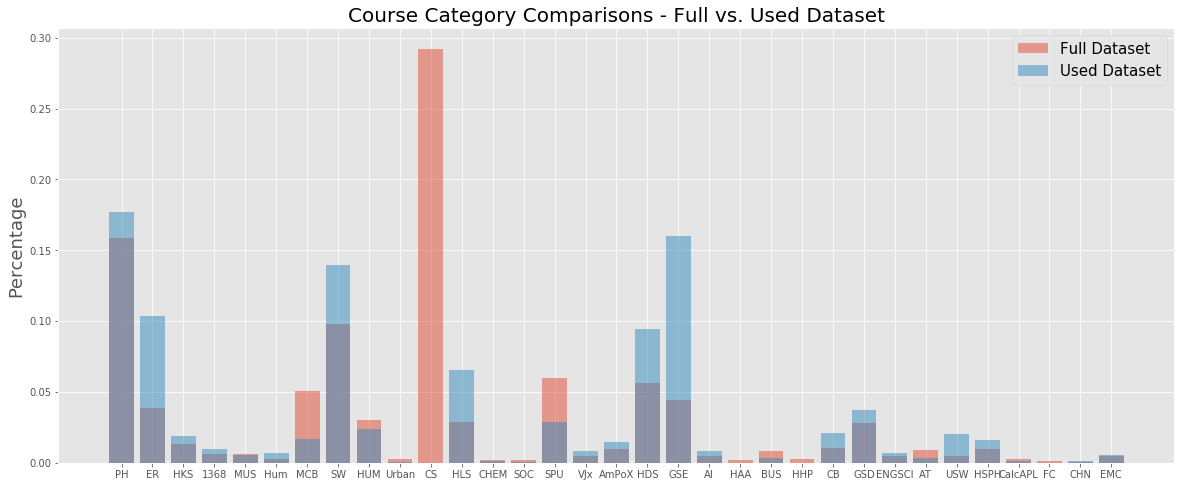

In [9]:
#compare course categories
fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(test_course.keys(), course_test, alpha = 0.5, label = 'Full Dataset')
ax.bar(test_course.keys(), course_clean, alpha = 0.5, label = 'Used Dataset')
ax.legend(fontsize = 15)
ax.set_ylabel('Percentage', fontsize = 18)
ax.set_title('Course Category Comparisons - Full vs. Used Dataset', fontsize = 20)
plt.show()

In [10]:
fig.savefig('figs/course_cat.png')

In [11]:
#country code percentages
cc_test, cc_clean = getPercentage(test_cc, clean_cc)

In [12]:
#country code not in used dataset
set(test_cc.keys())-set(clean_cc.keys())

{'',
 'AQ',
 'BQ',
 'FK',
 'IO',
 'KI',
 'KP',
 'MF',
 'MS',
 'NU',
 'PM',
 'SH',
 'SM',
 'ST',
 'TD',
 'TV',
 'VA',
 'YT'}

In [13]:
#LoE percentages
loe_test, loe_clean = getPercentage(test_loe, clean_loe)

In [14]:
#combine duplicate values
loe_test[-3] = loe_test[-3]+loe_test[-2]
#drop duplicate values and index
loe_test.pop(-2)
loe_clean.pop(-2)
loe = list(test_loe.keys())
loe.pop(-2)

'Learn'

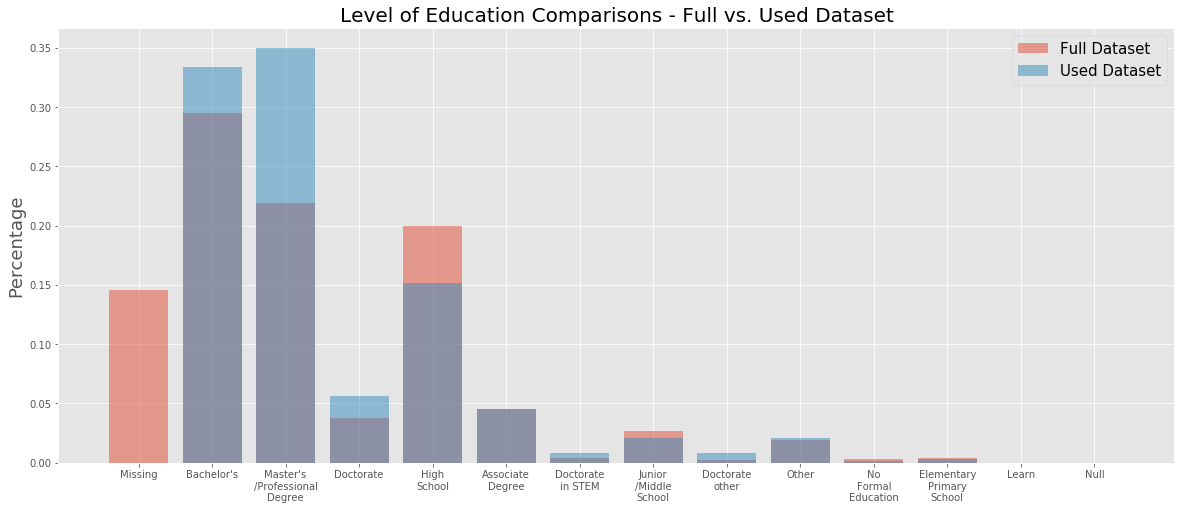

In [15]:
#compare level of education
labels = ['Missing', "Bachelor's", "Master's\n/Professional\nDegree",
          'Doctorate', 'High\nSchool', 'Associate\nDegree', 'Doctorate\nin STEM',
          'Junior\n/Middle\nSchool', 'Doctorate\nother','Other','No\nFormal\nEducation',
          'Elementary\nPrimary\nSchool','Learn', 'Null']
fig, ax = plt.subplots(figsize = (20, 8))
ax.bar(loe, loe_test, alpha = 0.5, label = 'Full Dataset')
ax.bar(loe, loe_clean, alpha = 0.5, label = 'Used Dataset')
ax.legend(fontsize = 15)
ax.set_ylabel('Percentage', fontsize = 18)
ax.set_title('Level of Education Comparisons - Full vs. Used Dataset', fontsize = 20)
ax.set_xticklabels(labels)
plt.show()

In [16]:
fig.savefig('figs/loe.png')

In [17]:
#gender percentages
gender_test, gender_clean = getPercentage(test_gender, clean_gender)

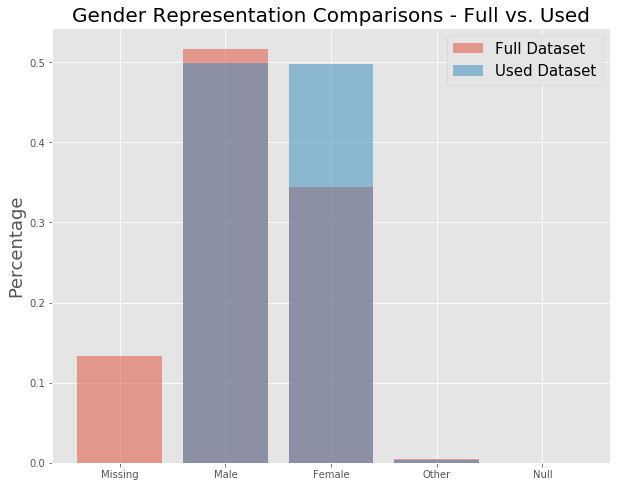

In [18]:
#compare gender
labels = ['Missing', 'Male', 'Female', 'Other', 'Null']
fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(test_gender.keys(), gender_test, alpha = 0.5, label = 'Full Dataset')
ax.bar(test_gender.keys(), gender_clean, alpha = 0.5, label = 'Used Dataset')
ax.legend(fontsize = 15)
ax.set_xticklabels(labels)
ax.set_ylabel('Percentage', fontsize = 18)
ax.set_title('Gender Representation Comparisons - Full vs. Used', fontsize = 20)
plt.show()

In [19]:
fig.savefig('figs/gender.png')

In [20]:
#full dataset grade
missing = 0
test_grade_new = list()
for g in test_grade:
    if g == '':
        missing += 1
    else:
        try:
            test_grade_new.append(float(g))
        except:
            print(g)
print('Number of missing grade: ', missing)

Number of missing grade:  1930278


In [21]:
#used dataset grade
missing = 0
clean_grade_new = list()
for g in clean_grade:
    if g == '':
        missing += 1
    else:
        try:
            clean_grade_new.append(float(g))
        except:
            print(g)
print('Number of missing grade: ', missing)

Number of missing grade:  0


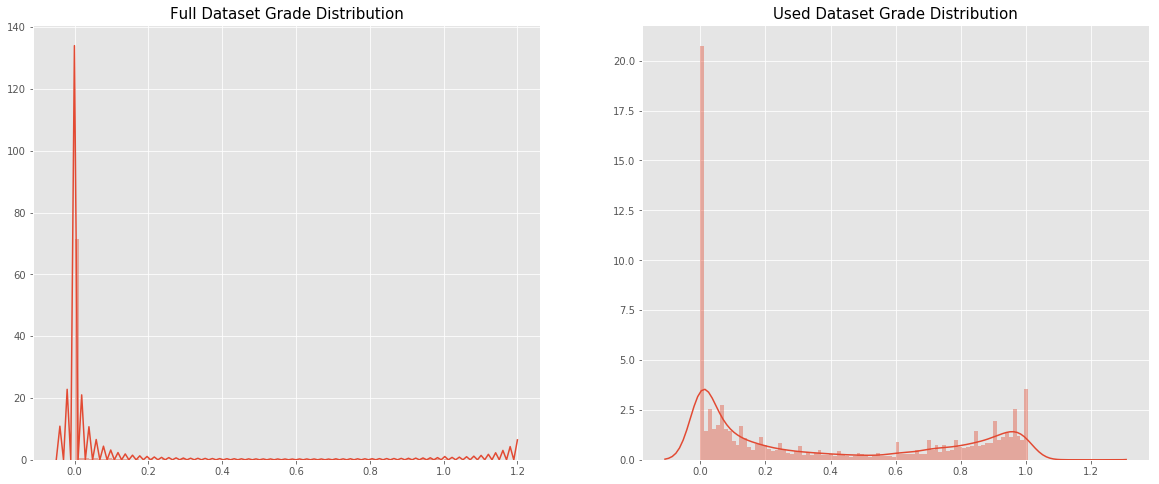

In [22]:
#compare grade distribution
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20, 8))
sns.distplot(test_grade_new, bins = 100, hist = True, ax = ax1, label = 'Full Dataset')
sns.distplot(clean_grade_new, bins = 100, hist = True, ax = ax2, label = 'Used Dataset')
ax1.set_title('Full Dataset Grade Distribution', fontsize = 15)
ax2.set_title('Used Dataset Grade Distribution', fontsize = 15)
plt.show()

In [24]:
#full dataset grade
missing = 0
test_yob_new = list()
for y in test_yob:
    if y == '':
        missing += 1
    else:
        try:
            test_yob_new.append(int(y))
        except:
            print(y)
print('Number of missing yob: ', missing)

Number of missing yob:  1049890


In [25]:
#used dataset grade
missing = 0
clean_yob_new = list()
for y in clean_yob:
    if y == '':
        missing += 1
    else:
        try:
            clean_yob_new.append(int(y))
        except:
            print(y)
print('Number of missing yob: ', missing)

Number of missing yob:  0


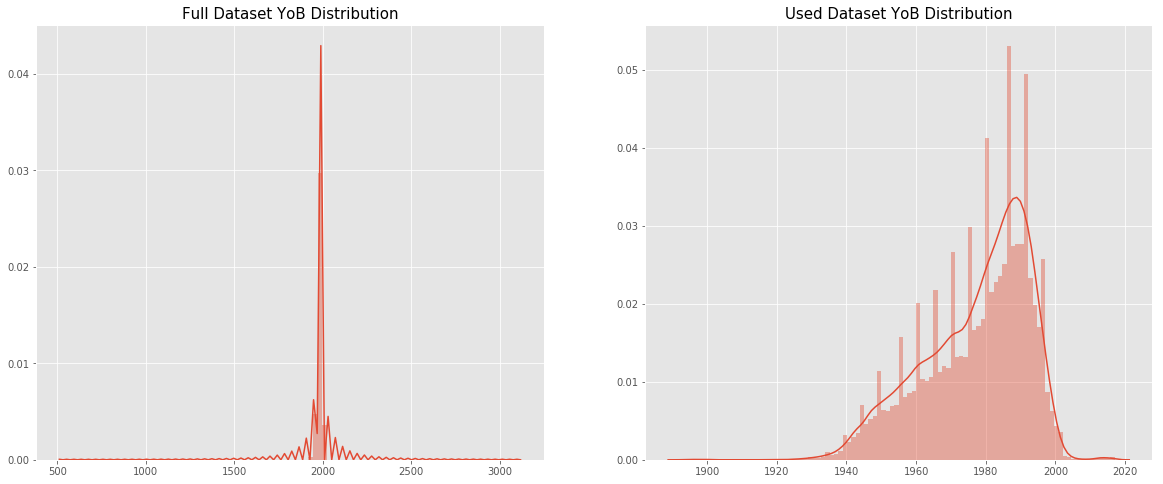

In [26]:
#compare year of birth distribution
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20, 8))
sns.distplot(test_yob_new, bins = 100, hist = True, ax = ax1, label = 'Full Dataset')
sns.distplot(clean_yob_new, bins = 100, hist = True, ax = ax2, label = 'Used Dataset')
ax1.set_title('Full Dataset YoB Distribution', fontsize = 15)
ax2.set_title('Used Dataset YoB Distribution', fontsize = 15)
plt.show()